# Project_01_Visual Data Analysis_Animated Scatterplot

### Importing necessary python libraries 

In [1]:
!pip install plotly_express
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
!pip install -U kaleido
from matplotlib import rcParams
import imageio
%matplotlib inline

### Reading the CSV and Excel files and creating pandas dataframes

In [2]:
fertility = pd.read_csv('/home/arman/github_arman_spiced/01/gapminder_total_fertility.csv', index_col = 0)

life_expectancy = pd.read_excel('/home/arman/github_arman_spiced/01/gapminder_lifeexpectancy.xlsx', index_col = 0)

population = pd.read_csv('/home/arman/github_arman_spiced/01/population.csv', index_col = 0)

continent = pd.read_csv('/home/arman/github_arman_spiced/01/continents.csv', sep=";")

#### Now let's take a look at the created dataframes

In [3]:
fertility.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total fertility rate,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71


In [4]:
life_expectancy.head()

,1800.0,1801.0,1802.0,1803.0,1804.0,1805.0,1806.0,1807.0,1808.0,1809.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
Life expectancy,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [5]:
population.head()

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total population,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,4710171.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,741688.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,4525691.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0


In [6]:
continent.head()

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


## Creating Animated Scatterplot
#### In this part, the famous Hans Rosling's animation will be reproduced
#### 1. Multiple dataframes will be created using fertility, life expectancy and population. then these dataframes will be transfered into long format with similar number of rows and then will be merged 
#### 2. For each year a separate scatter plot will be created
#### 3. The created scatter plots will be combined to create an animated gif (this method was used to practice data wrangling and visualization. we can also make this animation much faster and easier using the new library called PlotlyExpress that is very simple, fast and easy to use to build Interactive Visualizations.

In [7]:
fertility.columns

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)

In [8]:
life_expectancy.columns

Float64Index([1800.0, 1801.0, 1802.0, 1803.0, 1804.0, 1805.0, 1806.0, 1807.0,
              1808.0, 1809.0,
              ...
              2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0,
              2015.0, 2016.0],
             dtype='float64', length=217)

In [9]:
population.columns

Index(['1800', '1810', '1820', '1830', '1840', '1850', '1860', '1870', '1880',
       '1890', '1900', '1910', '1920', '1930', '1940', '1950', '1951', '1952',
       '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype='object')

In [10]:

# in order to be able to merge the dataframes together and prepare it for visualisation, it is necessary that the data types have the same format

fertility.columns = fertility.columns.astype(int)
population.columns = population.columns.astype(int)

In [11]:
fertility.index.name = 'country'
fertility

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zambia,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,...,5.93,5.91,5.88,5.85,5.81,5.77,5.73,5.69,5.64,5.59
Zimbabwe,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,...,3.94,3.90,3.85,3.79,3.72,3.64,3.56,3.49,3.41,3.35


In [12]:
fertility = fertility.reset_index()
fertility

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
4,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,Zambia,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,...,5.93,5.91,5.88,5.85,5.81,5.77,5.73,5.69,5.64,5.59
257,Zimbabwe,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,...,3.94,3.90,3.85,3.79,3.72,3.64,3.56,3.49,3.41,3.35
258,Åland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df1 = fertility.melt(id_vars='country', var_name='year', value_name='fertility_rate')
df1.head()

,country,year,fertility_rate
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56160 entries, 0 to 56159
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         56160 non-null  object 
 1   year            56160 non-null  object 
 2   fertility_rate  43412 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.3+ MB


In [15]:
# Now we repeat the same with the other dataframes

In [16]:
life_expectancy.index.name = 'country'
life_expectancy = life_expectancy.reset_index()
df2 = life_expectancy.melt(id_vars='country', var_name='year', value_name='life_expectancy')
df2.head()

,country,year,life_expectancy
0,Abkhazia,1800.0,NaN
1,Afghanistan,1800.0,28.21
2,Akrotiri and Dhekelia,1800.0,NaN
3,Albania,1800.0,35.40
4,Algeria,1800.0,28.82


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          56420 non-null  object 
 1   year             56420 non-null  object 
 2   life_expectancy  43857 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.3+ MB


In [18]:
population.index.name = 'country'
population = population.reset_index()
df3 = population.melt(id_vars='country', var_name='year', value_name='population')
df3

,country,year,population
0,Abkhazia,1800,NaN
1,Afghanistan,1800,3280000.0
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,410445.0
4,Algeria,1800,2503218.0
...,...,...,...
22270,Northern Marianas,2015,NaN
22271,South Georgia and the South Sandwich Islands,2015,NaN
22272,US Minor Outlying Islands,2015,NaN
22273,Virgin Islands,2015,NaN


In [19]:
df1.year = df1.year.astype(int)

df2.year = df2.year.astype(int)

df3.year = df3.year.astype(int)

In [20]:
# Now let's merge the tables

In [21]:
df=df1.merge(df2)
df

,country,year,fertility_rate,life_expectancy
0,Abkhazia,1800,NaN,NaN
1,Afghanistan,1800,7.00,28.21
2,Akrotiri and Dhekelia,1800,NaN,NaN
3,Albania,1800,4.60,35.40
4,Algeria,1800,6.99,28.82
...,...,...,...,...
56155,Yugoslavia,2015,NaN,NaN
56156,Zambia,2015,5.59,56.70
56157,Zimbabwe,2015,3.35,59.30
56158,Åland,2015,NaN,NaN


In [22]:
df=df.merge(df3)
df

,country,year,fertility_rate,life_expectancy,population
0,Abkhazia,1800,NaN,NaN,NaN
1,Afghanistan,1800,7.00,28.21,3280000.0
2,Akrotiri and Dhekelia,1800,NaN,NaN,NaN
3,Albania,1800,4.60,35.40,410445.0
4,Algeria,1800,6.99,28.82,2503218.0
...,...,...,...,...,...
20974,Yugoslavia,2015,NaN,NaN,NaN
20975,Zambia,2015,5.59,56.70,16211767.0
20976,Zimbabwe,2015,3.35,59.30,15602751.0
20977,Åland,2015,NaN,NaN,NaN


In [23]:
df=df.merge(continent)
df.head()

,country,year,fertility_rate,life_expectancy,population,continent
0,Afghanistan,1800,7.0,28.21,3280000.0,Asia
1,Afghanistan,1810,7.0,28.11,3280000.0,Asia
2,Afghanistan,1820,7.0,28.01,3323519.0,Asia
3,Afghanistan,1830,7.0,27.90,3448982.0,Asia
4,Afghanistan,1840,7.0,27.80,3625022.0,Asia


In [24]:
# lets create a scatter plot for year 2000
year = 2000
df_2000 = df.loc[df['year'] == year]

In [25]:
df_2000

,country,year,fertility_rate,life_expectancy,population,continent
65,Afghanistan,2000,7.73,50.1,19701940.0,Asia
146,Albania,2000,2.38,74.7,3121965.0,Europe
227,Algeria,2000,2.51,73.3,31183658.0,Africa
308,Andorra,2000,NaN,83.7,65399.0,Europe
389,Angola,2000,6.84,52.3,15058638.0,Africa
...,...,...,...,...,...,...
13835,Venezuela,2000,2.82,73.8,24481477.0,South America
13916,Vietnam,2000,1.98,72.0,80285563.0,Asia
13997,Yemen,2000,6.36,62.4,17795219.0,Asia
14078,Zambia,2000,6.07,44.8,10585220.0,Africa


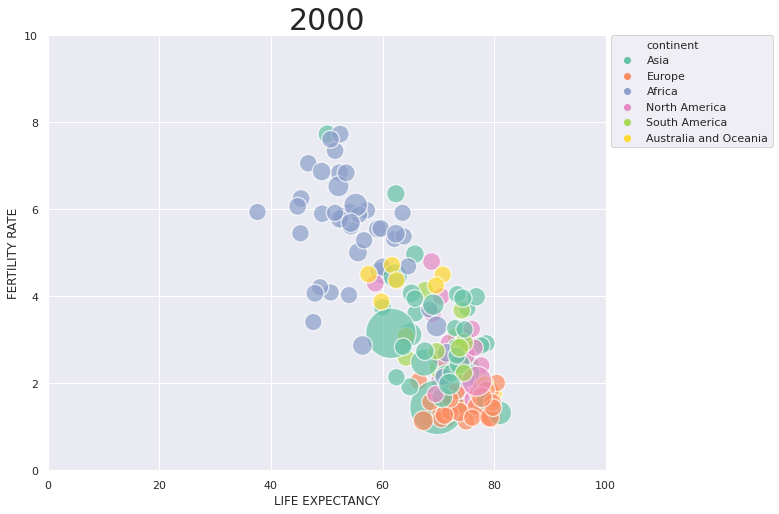

In [26]:
sns.set(rc = {'figure.figsize':(10,8)})
fig = sns.scatterplot(x='life_expectancy', y='fertility_rate', hue='continent', size='population', 
                sizes=(300, 3000), legend=True, data=df_2000, alpha=0.7, palette='Set2')
fig.set_xlabel( "LIFE EXPECTANCY")
fig.set_ylabel( "FERTILITY RATE")
fig.set_xlim(0, 100)
fig.set_ylim(0,10)
fig.legend(fontsize='17')
fig.set_title("2000", fontsize = 30)


# cleaning up the legend
h,l = fig.get_legend_handles_labels()
plt.legend(h[0:7],l[0:7],bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0)


In [34]:
for i in range(1961,2016):
    df_subset = df.loc[df['year'] == i]
    sns.scatterplot(x='life_expectancy', y='fertility_rate', hue='continent', size='population', 
                sizes=(300, 3000), legend=True, data=df_subset, alpha=0.7, palette='Set2')
    plt.title(str(i))
    plt.axis((20, 100, 0, 10))
    h,l = fig.get_legend_handles_labels()
    plt.legend(h[0:7],l[0:7],bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0)
    plt.savefig('graph_'+str(i)+'.png')
    plt.close()

In [35]:
images = []
for i in range(1961, 2016):
    filename = 'graph_{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('Annimated_Plot.gif', images, fps=10)